Transactions Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None

Products Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtype

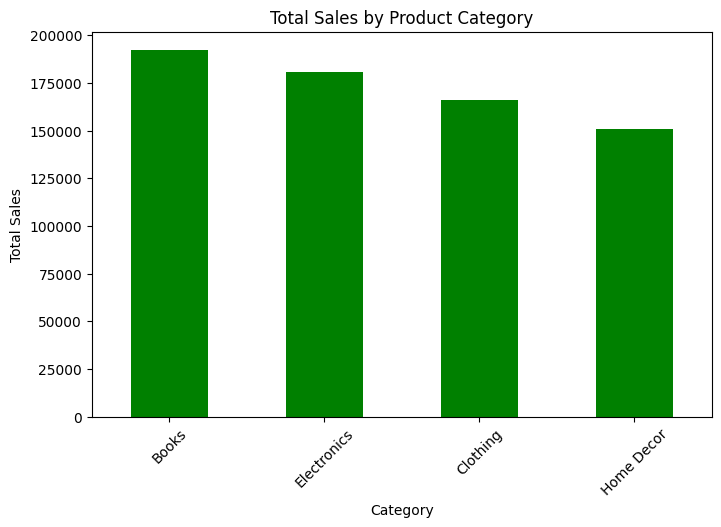

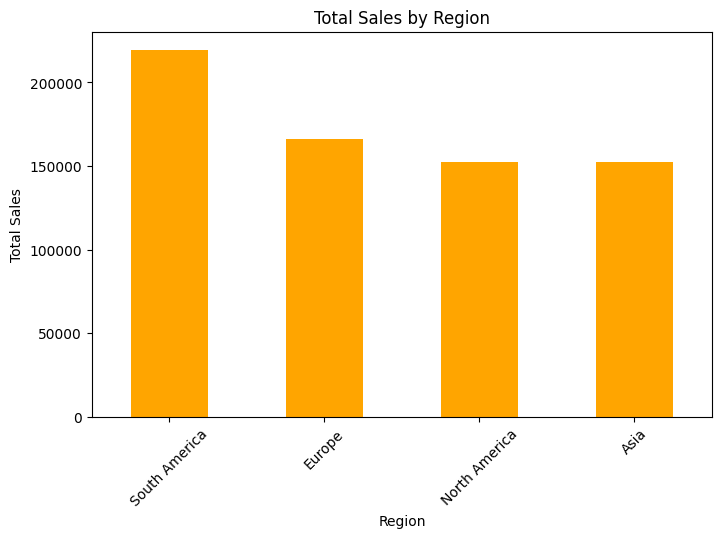

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

transactions_path = 'Transactions.csv'
products_path = 'Products.csv'
customers_path = 'Customers.csv'

transactions_df = pd.read_csv(transactions_path)
products_df = pd.read_csv(products_path)
customers_df = pd.read_csv(customers_path)

# Basic information about datasets
print("Transactions Dataset Info:\n")
print(transactions_df.info())
print("\nProducts Dataset Info:\n")
print(products_df.info())
print("\nCustomers Dataset Info:\n")
print(customers_df.info())

# Missing values check
print("\nMissing Values:\n")
print("Transactions:\n", transactions_df.isnull().sum())
print("\nProducts:\n", products_df.isnull().sum())
print("\nCustomers:\n", customers_df.isnull().sum())

# Stats
print("\nSummary:\n")
print("Transactions:\n", transactions_df.describe())
print("\nProducts:\n", products_df.describe())
print("\nCustomers:\n", customers_df.describe())

# Total Sales by Product Category
merged_df = transactions_df.merge(products_df, on='ProductID', how='left')
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='green')
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Total Sales by Region
merged_customers = transactions_df.merge(customers_df, on='CustomerID', how='left')
region_sales = merged_customers.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()